# Assignment 2 rubric

# Task 0

In [209]:
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In [210]:
wildfire = gpd.read_file('data/oregon_fires.shp')

# Task 1

In [211]:
wildfire.shape

(8702, 3)

In [212]:
wildfire[wildfire['year'] == 2021].shape[0]

271

In [213]:
wildfire_reproject = wildfire.to_crs('EPSG:32610')
wildfire_reproject['area'] = wildfire_reproject.area
wildfire_reproject.sort_values(by='area', ascending=False).head(5)

,year,name,geometry,area
6204,2012,Long Draw,"POLYGON ((941973.412 4689496.078, 941969.912 4...",2.267397e+09
5771,2002,Biscuit,"MULTIPOLYGON (((431847.040 4719759.526, 431865...",2.023472e+09
1258,2012,Holloway,"POLYGON ((891362.675 4682114.905, 891513.023 4...",1.871568e+09
7276,2021,Bootleg,"MULTIPOLYGON (((644470.778 4751332.348, 644455...",1.673948e+09
5452,2014,Saddle Draw,"POLYGON ((894790.231 4829334.974, 894928.493 4...",1.137893e+09


In [214]:
wildfire_2021 = wildfire_reproject[wildfire_reproject['year'] == 2021]
wildfire_2021['area'].sum() / 1000000

4273.346142798038

# Task 2

In [215]:
owls = gpd.read_file('data/spotted_owls.shp')

In [216]:
owls.shape

(1821, 3)

In [217]:
(owls[owls['females'] == 1].shape[0] / owls.shape[0]) * 100

82.8665568369028

In [218]:
owls['geometry'].y.max()

45.490113760000156

In [219]:
owls['geometry'].x.max()

-121.98568051428559

In [220]:
owls_reproject = owls.to_crs('EPSG:32610')

In [221]:
owls_reproject['pairs'] = (owls_reproject['males'] == 1) & (owls_reproject['females'] == 1)

In [222]:
owls_reproject['pairs'] = owls_reproject['pairs'].astype(int)

In [223]:
owls_reproject

,males,females,geometry,pairs
0,1.0,1.0,POINT (470303.870 4855199.056),1
1,1.0,0.0,POINT (469805.124 5022919.501),0
2,1.0,0.0,POINT (469515.128 5023059.499),0
3,1.0,1.0,POINT (558395.071 4656517.664),1
4,1.0,1.0,POINT (467103.826 4853099.018),1
...,...,...,...,...
1816,1.0,1.0,POINT (456668.244 4901979.778),1
1817,1.0,1.0,POINT (489540.427 4829445.475),1
1818,1.0,1.0,POINT (480109.937 4846579.835),1
1819,1.0,1.0,POINT (453394.406 4726797.099),1


# Task 3

In [224]:
join = owls_reproject.sjoin(wildfire_reproject, how="left")

In [225]:
join = join.dropna()

In [228]:
join['pairs'].sum()

324

In [245]:
join.groupby('year')['pairs'].sum()

year
1910.0     8
1914.0    22
1926.0     2
1936.0    31
1945.0     1
1951.0     5
1966.0     0
1987.0    17
1994.0     5
2001.0     2
2002.0    22
2005.0     4
2008.0     1
2009.0     2
2013.0    47
2014.0     3
2015.0    22
2016.0     1
2017.0    18
2018.0    36
2019.0     9
2020.0    58
2021.0     8
Name: pairs, dtype: int64

In [246]:
join.groupby('name')['pairs'].sum()

name
Archie Creek                       40
BLOSSOM                             2
BRIMSTONE                           2
BURNT PEAK                          5
Beachie Creek                       6
Big Windy                           7
Biscuit                             1
Bland Mountain                      1
Blossom                             2
Board Mountain                      1
Buck Creek                          2
Cable Crossing                      2
Canyon Mtn                          1
Cat Hill                            0
Chetco Bar                          4
Cleveland Ridge                     1
Dads Creek                         17
Doubleday                           1
EAST ANTELOPE                       1
EAST EVANS                          4
FRENCH PEAK                         1
GALICE                              2
Galice                              2
HULL MTN                            1
Holiday Farm                        4
Horse Prairie                      14
Hubbard

<AxesSubplot: >

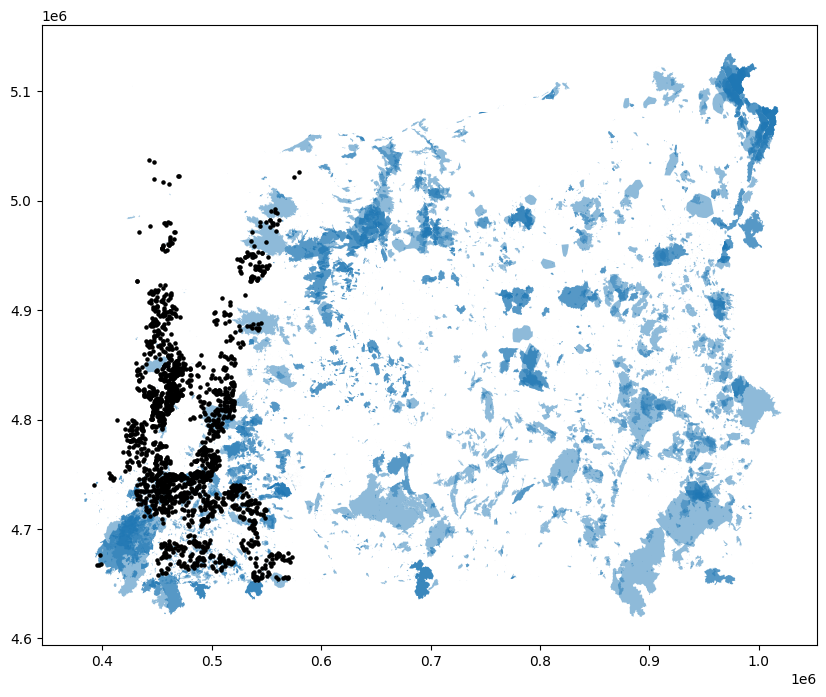

In [263]:
ax = wildfire_reproject.plot(figsize=(10, 10), alpha=0.5)
owls_reproject.plot(ax=ax, color='black', markersize=5)

In [269]:
wildfire_reproject['geometry'].intersects(wildfire_reproject['geometry']).sum()

8702